**MSc Computational Physics AUTH**<br>
**Computational Nuclear Physics**<br>
**Academic Year: 2023-2024**<br>
**Semester 2**<br>
**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**

**Presentation date: 9/7/2024**

# **PROJECT #3:** ***Calculating the time evolution for the amount N and the activity A of nuclei in a radioactive chain***
**Jupyter Notebook**<br> 

**Contents:**<br>
*->1. Brief theoretical introduction*<br>
*->2. Codes*<br>
*->3. Examples*

**References:**<br>
*1. Brian Martin - Nuclear and Particle Physics_ An Introduction-Wiley (2009)*<br>
*2. K. Heyde - Basic Ideas and Concepts in Nuclear Physics - An Intro. Approach-IOP (1999)*

## **1. Brief theoretical introduction**

***A. Project's goal***

Nuclei, as they decay, often form a series of reactions. An initial sample of a **parent** nucleus is converted into a sample of one or more **daughter** nuclei in a **radioactive chain**. The final product is, in most cases, a stable nucleus or at least a nucleus with an extremely long half-life. In this project, we will try to visualize the decay progress by calculating the **time evolution** of the **number** and **activity** of the nuclei in the chain.

***B. Decay of a single nucleus***

A radioactive nucleus disintegrates with a rate $λ$. Furthermore, the product $λdt$ gives the probability a nucleus decays in a short time interval $dt$. The statistical nature of the decay process does not allow us to refer to a single nucleus, rather than a sample of nuclei. The rate of the nuclei dissappearance from the sample, due to decay, is given by:
$$\frac{dN}{dt}=-λN$$
where $N$ is the number of nuclei at a given moment $t$. Assuming, now, we start with $N_0$ nuclei of an element, at time $t_0=0$ (i.e having the initial condition: $N(t=0)=N_0$), the above differential equation can be easily integrated, leading to the following formula for $N(t)$: $$N(t)=N_0 e^{-λt}$$
Also, when a nucleus decays, it emits measurable objects (such as $α$ particles or $γ$ photons, etc.). The rate of emission is:
$$\frac{dN_a}{dt}=-\frac{dN}{dt}=λN(t)=λN_0 e^{-λt}$$ 
or 
$$R(t)=R_0 e^{-λt}$$
whith $R$ the activity of the decaying substance. As we can see, both the number $N(t)$ and the activity $R(t)$ of nuclei follow an exponential reduction law. Two important values are defined in this case. The **half-life** $T$ (i.e. the time at wich the number of the nuclei in the sample has decreased to the half of the initial value: $N(t=T)=N_0$) and the **mean lifetime** $τ$ (i.e. the average time a nucleus is expected to live before decaying). Both values are related to the decay rate $λ$, as shown:
$$T = \frac{ln2}{λ} = τ*ln2$$
and $$τ = \frac{1}{λ}$$

***C. Decay in a radioactive chain of nuclei***

In a general decay chain, like the one below:
$$N_1\xrightarrow{λ_1}N_2\xrightarrow{λ_2}N_3\xrightarrow{λ_3}\dots$$ 
the differential equation the produces $N(t)$ must be modified, for each nucleus in the series separately. More specifically, we have the following system of differential equations for a chain of $n$ nuclei:
$$\frac{dN_1}{dt}=-λ_1N_1$$ 
$$\frac{dN_2}{dt}=λ_1N_1-λ_2N_2$$
$$\frac{dN_3}{dt}=λ_2N_2-λ_3N_3$$
$$\vdots$$
$$\frac{dN_k}{dt}=λ_{k-1}N_{k-1}-λ_kN_k$$
$$\vdots$$
$$\frac{dN_n}{dt}=λ_{n-1}N_{n-1}-λ_kN_k$$
where for the intermediate nuclei of the chain (i.e. $N_2$, $N_3$, etc.), an additional positive term, the one of their creation (i.e. $λ_1Ν_1$ for $N_2$, $λ_2Ν_2$ for $N_3$, etc.), is included in their differential equation, together with the negative term of their decay (i.e. $-λ_2Ν_2$ for $N_2$, $-λ_3Ν_3$ for $N_3$, etc.). The system above is a system of linear differential equations with constant coefficients $λ_k$, yielding to the general solution:

$N_1(t)=a_{11}e^{-λ_1t}$<br>
$N_2(t)=a_{21}e^{-λ_1t}+a_{22}e^{-λ_2t}$<br>
$N_3(t)=a_{31}e^{-λ_1t}+a_{32}e^{-λ_2t}+a_{33}e^{-λ_3t}$<br>
$\vdots$<br>
$N_k(t)=a_{k1}e^{-λ_1t}+a_{k2}e^{-λ_2t}+\dots+a_{kk}e^{-λ_kt}$<br>
$\vdots$<br>
$N_n(t)=a_{n1}e^{-λ_1t}+a_{n2}e^{-λ_nt}+\dots+a_{nk}e^{-λ_kt}+\dots+a_{nn}e^{-λ_nt}$<br>

with initial conditions:

$$a_{11}=N_1(t=0)=N_0$$
$$\sum_{i=1}^{k}a_{ki}=0$$

***D. Matrix form of the solutions***

The general solution can be written in matrix form, like below:
$$\begin{bmatrix}N_1(t)\\ N_2(t)\\ N_3(t)\\ \vdots\\ N_k(t)\\ \vdots\\ N_n(t)\end{bmatrix} = 
\begin{bmatrix}
a_{11} & 0 & 0 & 0 & \cdots & 0 & 0 \\
a_{21} & a_{22} & 0 & 0 & \cdots & 0 & 0 \\
a_{31} & a_{32} & a_{33} & 0 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
a_{k1} & a_{k2} & a_{k3} & a_{k4} & \cdots & a_{kk} & 0 \\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \\
a_{n1} & a_{n2} & a_{n3} & a_{n4} & \cdots & a_{nk} & a_{nn}
\end{bmatrix}
\begin{bmatrix}
e^{-\lambda_1 t} \\
e^{-\lambda_2 t} \\
e^{-\lambda_3 t} \\
\vdots \\
e^{-\lambda_k t} \\
\vdots \\
e^{-\lambda_n t}
\end{bmatrix}$$
or
$$N=A*E$$
with the elements $e_k$ of $E$ being functions of time t and the elements $a_{ki}$ given by the formula:
$$a_{ki} = \frac{λ_1λ_2\dotsλ_{k-1}}{(λ_1-λ_i)(λ_2-λ_i)\dots (λ_k-λ_i)}$$

Therefore, by knowing the decay rates $λ_k$ of all $n$ nuclei in the chain, one can calculate the matrices $A$ and $E$. Then by taking their matrix product $A*E$, we result in the matrix N, containing the time evolution expressions for the number of the nuclei.

**Notes**: 

Let's denote that the afformentioned method can only be applied for nuclei with different half-lives (i.e a certain value of half-life, can only be used once in the chain), otherwise the denominator of $a_{ki}$ will be zero at some point in the calculations, specifically when the algorithm will ecounter the same value of $λ=λ_{n1}=λ_{n2}$ for two different nuclei ($n_1\neq n_2$).

Furthermore, the algorithm considers only one source of decay (or production), i.e a main radioactive chain, and ignores any branch chains that may contribute positively or negatively in the amount $N_k$ of any $k$-th nucleus in the main chain. 

## **2. Codes**

The codes we developed in this Jupyter Notebook, are presented below:

### **2.1 Preliminary Work** 

First, we import the necessary **Python** libraries (modules). We use:

1. **Numpy** library for numerical calculations
2. **Sympy** library for symbolic display and symbolic calculations
3. **Matplotlib** library for plotting and visualization
4. **Time** library for measuring the time of processes

In [2]:
import numpy as np
import sympy as smp
from sympy import *
import matplotlib.pyplot as plt
import time as time

As part of the preliminary work, we also:

1. Define the necessary symbols. Here we only define the symbol ***t*** that represents the time.

2. Create a data table with the atomic numbers of the elements and their respective names. This is a **118 x 2** matrix,<br>
with the first column containing the atomic numbers and the second column containing the names of the elements. 

3. Define a function that returns the atomic nunber **Z** of an element, by importing it's name.

4. Define an inverse function thet returns the name of an element, by importing it's atomic number **Z**.

In [3]:
# Definition of symbols
t = smp.symbols("t")

# Elements data
elements = [
    [1, 'H'], [2, 'He'], [3, 'Li'], [4, 'Be'], [5, 'B'], [6, 'C'], [7, 'N'], [8, 'O'], [9, 'F'], [10, 'Ne'],
    [11, 'Na'], [12, 'Mg'], [13, 'Al'], [14, 'Si'], [15, 'P'], [16, 'S'], [17, 'Cl'], [18, 'Ar'], [19, 'K'], [20, 'Ca'],
    [21, 'Sc'], [22, 'Ti'], [23, 'V'], [24, 'Cr'], [25, 'Mn'], [26, 'Fe'], [27, 'Co'], [28, 'Ni'], [29, 'Cu'], [30, 'Zn'],
    [31, 'Ga'], [32, 'Ge'], [33, 'As'], [34, 'Se'], [35, 'Br'], [36, 'Kr'], [37, 'Rb'], [38, 'Sr'], [39, 'Y'], [40, 'Zr'],
    [41, 'Nb'], [42, 'Mo'], [43, 'Tc'], [44, 'Ru'], [45, 'Rh'], [46, 'Pd'], [47, 'Ag'], [48, 'Cd'], [49, 'In'], [50, 'Sn'],
    [51, 'Sb'], [52, 'Te'], [53, 'I'], [54, 'Xe'], [55, 'Cs'], [56, 'Ba'], [57, 'La'], [58, 'Ce'], [59, 'Pr'], [60, 'Nd'],
    [61, 'Pm'], [62, 'Sm'], [63, 'Eu'], [64, 'Gd'], [65, 'Tb'], [66, 'Dy'], [67, 'Ho'], [68, 'Er'], [69, 'Tm'], [70, 'Yb'],
    [71, 'Lu'], [72, 'Hf'], [73, 'Ta'], [74, 'W'], [75, 'Re'], [76, 'Os'], [77, 'Ir'], [78, 'Pt'], [79, 'Au'], [80, 'Hg'],
    [81, 'Tl'], [82, 'Pb'], [83, 'Bi'], [84, 'Po'], [85, 'At'], [86, 'Rn'], [87, 'Fr'], [88, 'Ra'], [89, 'Ac'], [90, 'Th'],
    [91, 'Pa'], [92, 'U'], [93, 'Np'], [94, 'Pu'], [95, 'Am'], [96, 'Cm'], [97, 'Bk'], [98, 'Cf'], [99, 'Es'], [100, 'Fm'],
    [101, 'Md'], [102, 'No'], [103, 'Lr'], [104, 'Rf'], [105, 'Db'], [106, 'Sg'], [107, 'Bh'], [108, 'Hs'], [109, 'Mt'], 
    [110, 'Ds'], [111, 'Rg'], [112, 'Cn'], [113, 'Nh'], [114, 'Fl'], [115, 'Mc'], [116, 'Lv'], [117, 'Ts'], [118, 'Og']
]

# Finding one element's atomic number by name
def find_elmt_Z(name):
    m = len(elements) # calculating the length of the elements data table
    # scanning the data table
    for i in range(0,m):
        # checking if the element's name is on the table
        if elements[i][1]==name:
            return elements[i][0] # returning element's atomic number Z
            break # terminating the scan
    return 'no element found' # return when the imported name is not-found

# Finding one element's name by atomic number
def find_elmt(Z):
    m = len(elements) # calculating the length of the elements data table
    # scanning the data table
    for i in range(0,m):
        # checking if the element's atomic number Z is on the table
        if elements[i][0]==Z:
            return elements[i][1] # returning element's name as a string variable 
            break # terminating the scan
    return 'no element found' # return when the imported atomic number is not-found

In [4]:
# Example for find_elmt_Z() function
print(find_elmt_Z('U'))
print(find_elmt_Z('A'))

92
no element found


In [5]:
# Example for find_elmt() function
print(find_elmt(92))
print(find_elmt(119))

U
no element found


### **2.2 Calculating the matrices A and E**
 

In [6]:
# Enumerator of a_ki element
def a_enum(L,k):
    prod = 1
    for j in range(1,k):
        prod = prod*L[j-1]
    return prod

# Denominator of a_ki element
def a_denom(L,k,i):
    prod = 1
    for j in range(1,k+1):
        if j==i:
            continue
        else:
            prod = prod*(L[j-1]-L[i-1])
    return prod        

In [7]:
# Calculating the A matrix
def A_matrix(L,N0):
    n = len(L)
    A = np.zeros([n,n])
    for k in range(1,n+1):
        for i in range(1,k+1):
            A[k-1,i-1] = N0*(a_enum(L,k)/a_denom(L,k,i))      
    return smp.Matrix(A)

In [8]:
# Calculating the E matrix
def E_matrix(L):
    n = len(L)
    E = []
    for j in range(1,n+1):
        ej = smp.exp(-L[j-1]*t)
        E.append(ej)
    return smp.Matrix(E)    

In [9]:
# Example for A and E matrices calculation
L = [1,5]
display(A_matrix(L,100))
display(E_matrix(L))

Matrix([
[100.0,     0],
[ 25.0, -25.0]])

Matrix([
[  exp(-t)],
[exp(-5*t)]])

### **2.3 Calculating and plotting the time evolution for the number $N(t)$ and activity $R(t)$ of nuclei** 

In [10]:
# Definition of a function that displays the decay formula
def decay_disp(A,elmt_name,dec_type):
    # a decay case
    if dec_type == "a":
        parent_nuc = elmt_name
        Z = find_elmt_Z(parent_nuc)
        product_nuc = find_elmt(Z-2)
        dec_symb = "_{%d}^{%d}%s->_{%d}^{%d}%s+_2^{4}He"%(Z,A,parent_nuc,Z-2,A-4,product_nuc)
        return smp.symbols(dec_symb)
    # b- decay case
    elif dec_type == "b-":
        parent_nuc = elmt_name
        Z = find_elmt_Z(parent_nuc)
        product_nuc = find_elmt(Z+1)
        dec_symb = "_{%d}^{%d}%s->_{%d}^{%d}%s+e^{-}+\overline{ν}_e"%(Z,A,parent_nuc,Z+1,A,product_nuc)
        return smp.symbols(dec_symb)
    # b+ decay case
    elif dec_type == "b+":
        parent_nuc = elmt_name
        Z = find_elmt_Z(parent_nuc)
        product_nuc = find_elmt(Z-1)
        dec_symb = "_{%d}^{%d}%s->_{%d}^{%d}%s+e^{+}+ν_e"%(Z,A,parent_nuc,Z-1,A,product_nuc)
        return smp.symbols(dec_symb)

In [11]:
# Example for a decay
display(decay_disp(232,"U","a"))

# Example for b- decay
display(decay_disp(244,"Am","b-"))

# Example for b- decay
display(decay_disp(244,"Am","b+"))

_{92}^{232}U->_{90}^{228}Th+_2^{4}He

_{95}^{244}Am->_{96}^{244}Cm+e^{-}+\overline{ν}_e

_{95}^{244}Am->_{94}^{244}Pu+e^{+}+ν_e

In [20]:
# Definition of a function to show the time evolution results
def time_evol(T_half,elmt_names,mass_numbers,decays,N0,tmax,texp1,texp2,t_intervals,tunit):
    print("RADIOACTIVE CHAIN RESULTS\n\n")
    
    # Asking the user for the details level in the presentation of the results
    display_style = int(input("Choose display type! [Detailed = 1, Default = AnyOtherNumber]:  "))

    print("Calculations and plotting\n")
    n = len(T_half) # number of nuclei in the chain
    L = np.zeros(n) # storage list for the decay rate values λ_k
    for k in range(0,n):
        L[k] = np.log(2)/T_half[k] # calculating the decay rate for the current nucleus
    A = A_matrix(L,N0) # calculating the A matrix
    E = E_matrix(L) # calculating the E matrix
    N = A*E # calculating the time evolution matrix N as the product A*E
    
    # Creating and combining time intervals for the log plots 
    t_exp_step = (texp2-texp1)/t_intervals
    time_log = []
    for i in range(0,t_intervals):
        texplow = texp1 + i*t_exp_step
        texpup = texp1 + (i+1)*t_exp_step
        time_interval = np.logspace(texplow,texpup,1000)
        # Avoiding the overlay of intervals
        if i==0:
            time_log.append(time_interval)
        else:
            time_log.append(time_interval[1:])        
    time_log = np.concatenate(time_log) # combining the intervals for the time space to be used in x-log-scale plots 
    time_lin = np.linspace(0,tmax,200) # creating the time space for x-lin-space plots
     
    # Defining the figures and axes for plots
    fig_lin, axes_lin = plt.subplots(2,1)
    fig_log, axes_log = plt.subplots(2,1)
    axN_lin = axes_lin[0]
    axR_lin = axes_lin[1]
    axN_log = axes_log[0]
    axR_log = axes_log[1]
    
    # Display the results for each element in the chain
    for k in range(0,n):
        # Display name, atomic number and mass number
        if display_style!=1: #detailed style
            print(">ELEMENT %d:"%(k+1))
        else: # default style
            elmt_name = elmt_names[k]
            Aval = mass_numbers[k]
            Zval = find_elmt_Z(elmt_name)
            print(">ELEMENT %d [%s-%d]"%(k+1,elmt_name,Zval))
        print("=========================================================================================")
        # Display the half-life, the decay rate and the decay type and formula
        print(">>Decay Data")
        print("---------------------------------------------------------------------------------------") 
        print("T1/2 = %.4e (%s)"%(T_half[k],tunit))
        print("λ =  %.4e (1/%s)"%(L[k],tunit))
        if display_style==1: #detailed style
            print("Decay type: %s"%decays[k])
            print("Decay formula:")
            display(decay_disp(Aval,elmt_name,decays[k]))
        print("---------------------------------------------------------------------------------------")
        # Display the time evolution equations
        print(">>Time Evolution Functions")
        print("---------------------------------------------------------------------------------------") 
        print("Number of Nuclei N(t):")
        display(N[k])
        print("Activity of Nuclei R(t):")
        display(L[k]*N[k])
        # Checking for correct initial conditions
        if k==0:   
           print("a_11 = %.2f"%A[0,0])
           print("N0 = %.2f"%N0)
        else:
           a_ki_sum = 0
           for i in range(0,k+1):
               a_ki_sum = a_ki_sum + A[k,i]
           print("Σ(a_ki) = %.3e"%a_ki_sum)         
        print("---------------------------------------------------------------------------------------")
        # Display the supervision of the plotting process
        print(">>Plotting Supervision")
        print("---------------------------------------------------------------------------------------")
        start_time = time.time() # starting time measurement for plotting

        # Numerical functions for the time evolution of the current element
        # Time evolution for the number of nuclei in the sample
        def Nk(x):
            s = 0
            for i in range(0,k+1):
                s = s + A[k,i]*np.exp(-L[i]*x) 
            return s
        # Time evolution for the activity of nuclei in the sample
        def Rk(x):
            return L[k]*Nk(x)
        
        # Plotting the numerical functions
        if display_style!=1: # default style
            axN_lin.plot(time_lin,Nk(time_lin),label="$N%d(t)$"%(k+1))
            axR_lin.plot(time_lin,Rk(time_lin),label="$R%d(t)$"%(k+1))
            axN_log.plot(time_log,Nk(time_log),label="$N%d(t)$"%(k+1))
            axR_log.plot(time_log,Rk(time_log),label="$R%d(t)$"%(k+1))
        else: # detailed style
            axN_lin.plot(time_lin,Nk(time_lin),label="$_{%d}^{%d}%s$"%(Zval,Aval,elmt_name))
            axR_lin.plot(time_lin,Rk(time_lin),label="$_{%d}^{%d}%s$"%(Zval,Aval,elmt_name))
            axN_log.plot(time_log,Nk(time_log),label="$_{%d}^{%d}%s$"%(Zval,Aval,elmt_name))
            axR_log.plot(time_log,Rk(time_log),label="$_{%d}^{%d}%s$"%(Zval,Aval,elmt_name))
        end_time = time.time() # ending time measurement for plotting
        print("Functions included to graphs !!!")
        print("Elapsed time: %.3f sec"%(end_time-start_time))    
        print("=========================================================================================\n\n\n")      
    
    # Adding labels, legends, titles and grid to the graphs for clarity and showing them
    print("Graphs:  ")

    axN_lin.set_ylabel("Number of nuclei $N(t)$")
    axR_lin.set_xlabel("Time $t$ $(%s)$"%tunit)
    axR_lin.set_ylabel("Activity of nuclei $R(t)$")
    axN_lin.set_title("Time evolution for Number and Activity of nuclei (lin scale)")
    axN_lin.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
    if display_style!=1: # default style
        axR_lin.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
    axN_lin.set_xlim(0,tmax)
    axR_lin.set_xlim(0,tmax)
    axN_lin.grid()
    axR_lin.grid()


    axN_log.set_ylabel("Number of nuclei $N(t)$")
    axR_log.set_xlabel("Time $t$ $(%s)$"%tunit)
    axR_log.set_ylabel("Activity of nuclei $R(t)$")
    axN_log.set_title("Time evolution for Number and Activity of nuclei (log scale)")
    axN_log.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
    if display_style!=1: # default style
        axR_log.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
    axN_log.set_xscale("log")
    axR_log.set_xscale("log")
    axR_log.set_yscale("log")
    axN_log.set_xlim(10**texp1,10**texp2)
    axR_log.set_xlim(10**texp1,10**texp2)
    axN_log.grid()
    axR_log.grid()
    

## **3. Examples**

### **3.1 Two-nuclei series**

#### 3.1.1 Short-lived parent nucleus ($\tau_P<\tau_D$ or $\lambda_P>\lambda_D$)

RADIOACTIVE CHAIN RESULTS


Calculations and plotting

>ELEMENT 1:
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 1.0000e+00 (unit)
λ =  6.9315e-01 (1/unit)
---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


100.0*exp(-0.693147180559945*t)

Activity of Nuclei R(t):


69.3147180559945*exp(-0.693147180559945*t)

a_11 = 100.00
N0 = 100.00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.310 sec



>ELEMENT 2:
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 5.0000e+00 (unit)
λ =  1.3863e-01 (1/unit)
---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


-125.0*exp(-0.693147180559945*t) + 125.0*exp(-0.138629436111989*t)

Activity of Nuclei R(t):


-17.3286795139986*exp(-0.693147180559945*t) + 17.3286795139986*exp(-0.138629436111989*t)

Σ(a_ki) = 0.000e+00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.345 sec



Graphs:  


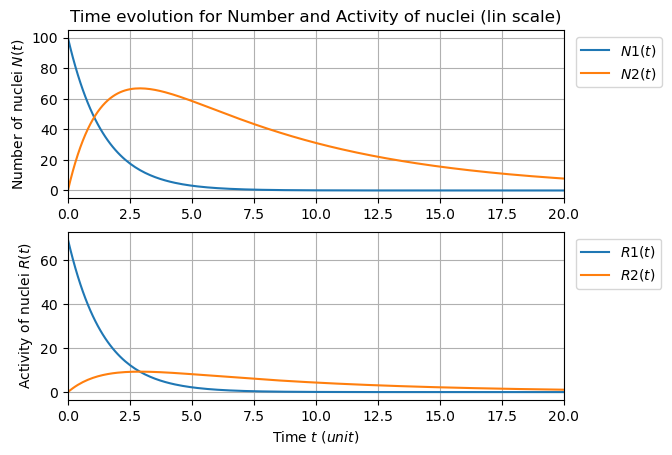

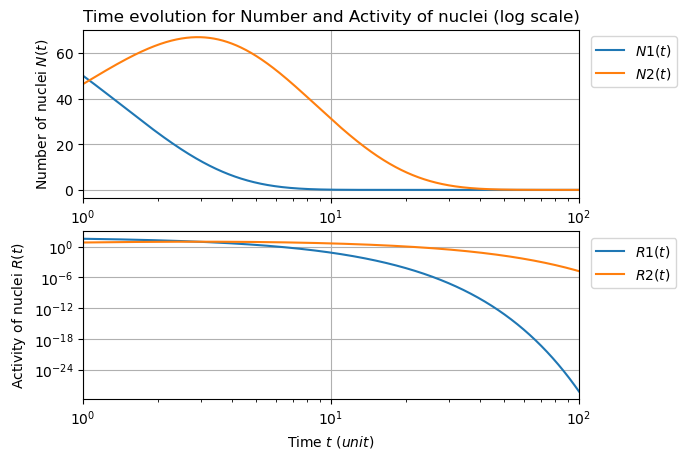

In [13]:
time_evol([1,5],_,_,_,100,20,0,2,2,'unit')

#### 3.1.2 Long-lived parent nucleus ($\tau_P>\tau_D$ or $\lambda_P<\lambda_D$)

RADIOACTIVE CHAIN RESULTS


Calculations and plotting

>ELEMENT 1:
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 1.0000e+01 (unit)
λ =  6.9315e-02 (1/unit)
---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


100.0*exp(-0.0693147180559945*t)

Activity of Nuclei R(t):


6.93147180559945*exp(-0.0693147180559945*t)

a_11 = 100.00
N0 = 100.00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.313 sec



>ELEMENT 2:
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 1.0000e+00 (unit)
λ =  6.9315e-01 (1/unit)
---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


-11.1111111111111*exp(-0.693147180559945*t) + 11.1111111111111*exp(-0.0693147180559945*t)

Activity of Nuclei R(t):


-7.70163533955495*exp(-0.693147180559945*t) + 7.70163533955495*exp(-0.0693147180559945*t)

Σ(a_ki) = 0.000e+00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.424 sec



Graphs:  


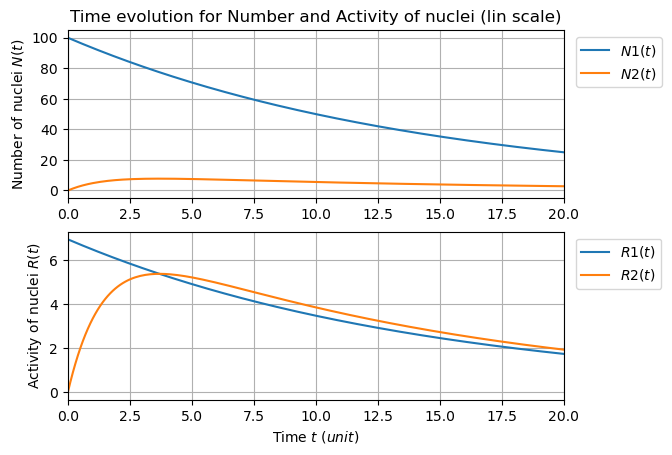

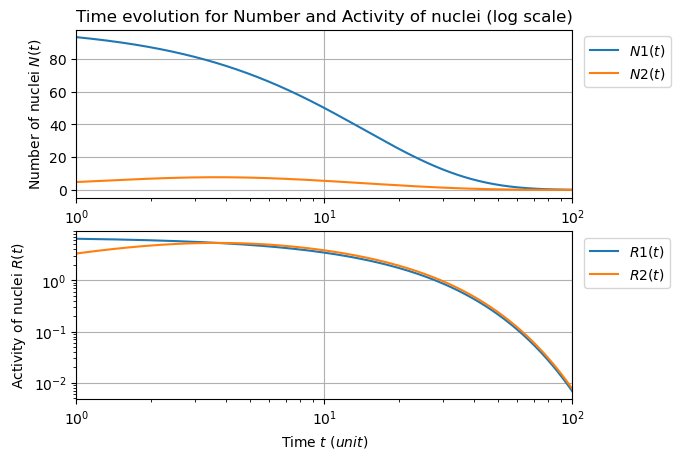

In [14]:
time_evol([10,1],_,_,_,100,20,0,2,2,'unit')

#### 3.1.3 Almost stable parent nucleus ($\tau_P\gg t\gg\tau_D$)

RADIOACTIVE CHAIN RESULTS


Calculations and plotting

>ELEMENT 1:
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 1.0000e+03 (unit)
λ =  6.9315e-04 (1/unit)
---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


100.0*exp(-0.000693147180559945*t)

Activity of Nuclei R(t):


0.0693147180559945*exp(-0.000693147180559945*t)

a_11 = 100.00
N0 = 100.00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.320 sec



>ELEMENT 2:
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 1.0000e+00 (unit)
λ =  6.9315e-01 (1/unit)
---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


-0.1001001001001*exp(-0.693147180559945*t) + 0.1001001001001*exp(-0.000693147180559945*t)

Activity of Nuclei R(t):


-0.0693841021581527*exp(-0.693147180559945*t) + 0.0693841021581527*exp(-0.000693147180559945*t)

Σ(a_ki) = 0.000e+00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.429 sec



Graphs:  


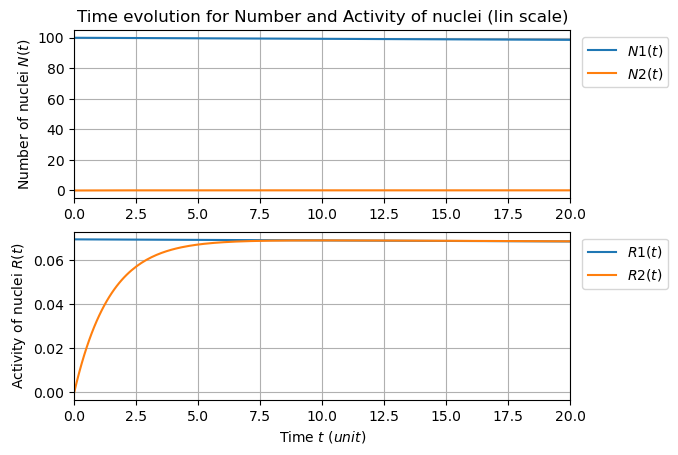

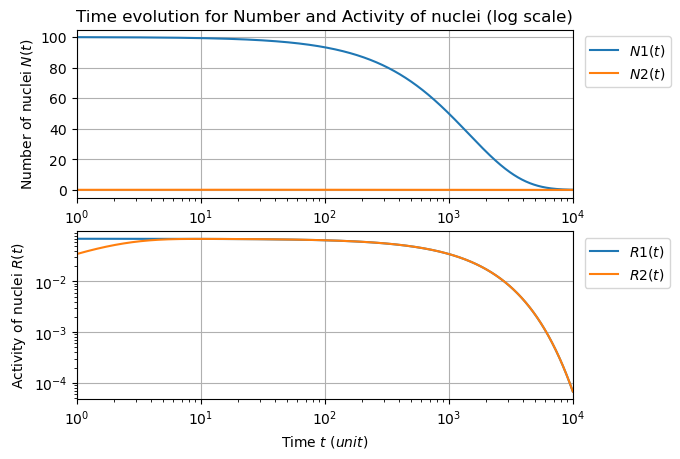

In [15]:
time_evol([1000,1],_,_,_,100,20,0,4,2,'unit')

### **3.2 Three-nuclei series**

#### 3.2.1 Stable third member nucleus ($\tau_3\gg \tau_1, \tau_2$ or $\lambda_3\ll \lambda_1,\lambda_2$)

RADIOACTIVE CHAIN RESULTS


Calculations and plotting

>ELEMENT 1:
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 1.0000e+00 (h)
λ =  6.9315e-01 (1/h)
---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


100.0*exp(-0.693147180559945*t)

Activity of Nuclei R(t):


69.3147180559945*exp(-0.693147180559945*t)

a_11 = 100.00
N0 = 100.00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.362 sec



>ELEMENT 2:
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 5.0000e+00 (h)
λ =  1.3863e-01 (1/h)
---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


-125.0*exp(-0.693147180559945*t) + 125.0*exp(-0.138629436111989*t)

Activity of Nuclei R(t):


-17.3286795139986*exp(-0.693147180559945*t) + 17.3286795139986*exp(-0.138629436111989*t)

Σ(a_ki) = 0.000e+00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.347 sec



>ELEMENT 3:
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 2.0000e+02 (h)
λ =  3.4657e-03 (1/h)
---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


25.1256281407035*exp(-0.693147180559945*t) - 128.205128205128*exp(-0.138629436111989*t) + 103.079500064425*exp(-0.00346573590279973*t)

Activity of Nuclei R(t):


0.0870787915276313*exp(-0.693147180559945*t) - 0.444325115743555*exp(-0.138629436111989*t) + 0.357246324215923*exp(-0.00346573590279973*t)

Σ(a_ki) = 2.842e-14
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.391 sec



Graphs:  


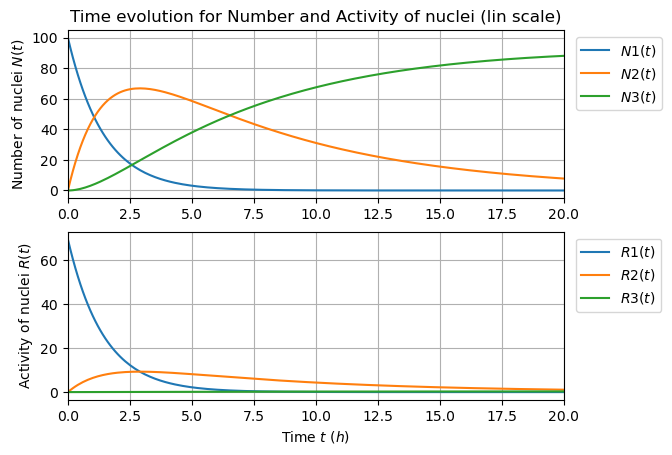

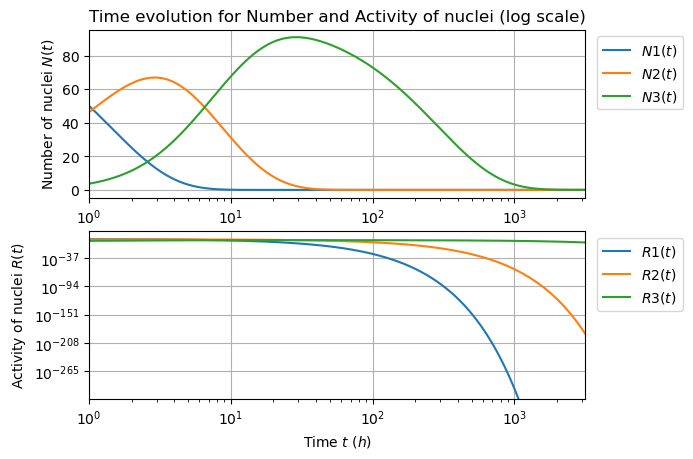

In [16]:
time_evol([1,5,200],_,_,_,100,20,0,3.5,2,'h')

### **3.3 Applications on real radioactive series**

RADIOACTIVE CHAIN RESULTS


Calculations and plotting

>ELEMENT 1 [Cf-98]
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 1.1400e+03 (s)
λ =  6.0802e-04 (1/s)
Decay type: a
Decay formula:


_{98}^{244}Cf->_{96}^{240}Cm+_2^{4}He

---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


100.0*exp(-0.000608023842596443*t)

Activity of Nuclei R(t):


0.0608023842596443*exp(-0.000608023842596443*t)

a_11 = 100.00
N0 = 100.00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 0.550 sec



>ELEMENT 2 [Cm-96]
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 2.3300e+06 (s)
λ =  2.9749e-07 (1/s)
Decay type: a
Decay formula:


_{96}^{240}Cm->_{94}^{236}Pu+_2^{4}He

---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


-100.048950988896*exp(-0.000608023842596443*t) + 100.048950988896*exp(-2.97488060326157e-7*t)

Activity of Nuclei R(t):


-2.97633683673534e-5*exp(-0.000608023842596443*t) + 2.97633683673534e-5*exp(-2.97488060326157e-7*t)

Σ(a_ki) = 0.000e+00
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 1.210 sec



>ELEMENT 3 [Pu-94]
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 1.0440e+05 (s)
λ =  6.6393e-06 (1/s)
Decay type: a
Decay formula:


_{94}^{236}Pu->_{92}^{232}U+_2^{4}He

---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


0.0494914123641993*exp(-0.000608023842596443*t) - 4.74265751734296*exp(-6.63934080996116e-6*t) + 4.69316610497876*exp(-2.97488060326157e-7*t)

Activity of Nuclei R(t):


3.28590353852245e-7*exp(-0.000608023842596443*t) - 3.14881196025642e-5*exp(-6.63934080996116e-6*t) + 3.11595292487119e-5*exp(-2.97488060326157e-7*t)

Σ(a_ki) = -8.882e-16
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 1.300 sec



>ELEMENT 4 [U-92]
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 2.2710e+09 (s)
λ =  3.0522e-10 (1/s)
Decay type: a
Decay formula:


_{92}^{232}U->_{90}^{228}Th+_2^{4}He

---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


-0.000540423739627428*exp(-0.000608023842596443*t) + 4.74287555178048*exp(-6.63934080996116e-6*t) - 104.849690752815*exp(-2.97488060326157e-7*t) + 100.107355624774*exp(-3.05216724156735e-10*t)

Activity of Nuclei R(t):


-1.64946363465616e-13*exp(-0.000608023842596443*t) + 1.4476049389975e-9*exp(-6.63934080996116e-6*t) - 3.2001879140421e-8*exp(-2.97488060326157e-7*t) + 3.05544391477869e-8*exp(-3.05216724156735e-10*t)

Σ(a_ki) = 1.421e-14
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 1.612 sec



>ELEMENT 5 [Th-90]
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 5.9920e+08 (s)
λ =  1.1568e-09 (1/s)
Decay type: a
Decay formula:


_{90}^{228}Th->_{88}^{224}Ra+_2^{4}He

---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


2.71283238792666e-10*exp(-0.000608023842596443*t) - 0.000218072432782758*exp(-6.63934080996116e-6*t) + 0.107993593977241*exp(-2.97488060326157e-7*t) - 35.9878613516786*exp(-1.15678768451259e-9*t) + 35.8800858298629*exp(-3.05216724156735e-10*t)

Activity of Nuclei R(t):


3.13817109650045e-19*exp(-0.000608023842596443*t) - 2.52263504574795e-13*exp(-6.63934080996116e-6*t) + 1.24925659519126e-10*exp(-2.97488060326157e-7*t) - 4.16303148035685e-8*exp(-1.15678768451259e-9*t) + 4.15056414072402e-8*exp(-3.05216724156735e-10*t)

Σ(a_ki) = -7.105e-15
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 1.403 sec



>ELEMENT 6 [Ra-88]
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 3.1970e+09 (s)
λ =  2.1681e-10 (1/s)
Decay type: a
Decay formula:


_{88}^{224}Ra->_{86}^{220}Rn+_2^{4}He

---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


-5.16126506178188e-16*exp(-0.000608023842596443*t) + 3.7996504454948e-8*exp(-6.63934080996116e-6*t) - 0.000420241311998931*exp(-2.97488060326157e-7*t) + 44.2887030338427*exp(-1.15678768451259e-9*t) - 469.494438801809*exp(-3.05216724156735e-10*t) + 425.206155971282*exp(-2.16811754945244e-10*t)

Activity of Nuclei R(t):


-1.1190229357825e-25*exp(-0.000608023842596443*t) + 8.23808881266207e-18*exp(-6.63934080996116e-6*t) - 9.111325635498e-14*exp(-2.97488060326157e-7*t) + 9.6023114290162e-9*exp(-1.15678768451259e-9*t) - 1.01791913213653e-7*exp(-3.05216724156735e-10*t) + 9.21896928896548e-8*exp(-2.16811754945244e-10*t)

Σ(a_ki) = -5.684e-14
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 1.609 sec



>ELEMENT 7 [Rn-86]
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 5.6000e+01 (s)
λ =  1.2378e-02 (1/s)
Decay type: a
Decay formula:


_{86}^{220}Rn->_{84}^{216}Po+_2^{4}He

---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


2.69001312726024e-30*exp(-0.0123776282242847*t) - 9.50773619479965e-24*exp(-0.000608023842596443*t) + 6.65919991543e-16*exp(-6.63934080996116e-6*t) - 7.36130093771521e-12*exp(-2.97488060326157e-7*t) + 7.75779668966705e-7*exp(-1.15678768451259e-9*t) - 8.22386275296254e-6*exp(-3.05216724156735e-10*t) + 7.44809044463085e-6*exp(-2.16811754945244e-10*t)

Activity of Nuclei R(t):


3.32959824076728e-32*exp(-0.0123776282242847*t) - 1.17683223873806e-25*exp(-0.000608023842596443*t) + 8.24251008243809e-18*exp(-6.63934080996116e-6*t) - 9.11154462541175e-14*exp(-2.97488060326157e-7*t) + 9.60231232642856e-9*exp(-1.15678768451259e-9*t) - 1.01791915723713e-7*exp(-3.05216724156735e-10*t) + 9.21896945044883e-8*exp(-2.16811754945244e-10*t)

Σ(a_ki) = -2.541e-21
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 1.983 sec



>ELEMENT 8 [Po-84]
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 1.5000e-01 (s)
λ =  4.6210e+00 (1/s)
Decay type: a
Decay formula:


_{84}^{216}Po->_{82}^{212}Pb+_2^{4}He

---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


-2.53618301429659e-48*exp(-4.62098120373297*t) + 7.22474429881892e-33*exp(-0.0123776282242847*t) - 2.54705019036142e-26*exp(-0.000608023842596443*t) + 1.78371682587314e-18*exp(-6.63934080996116e-6*t) - 1.97177716382645e-14*exp(-2.97488060326157e-7*t) + 2.07798125668101e-9*exp(-1.15678768451259e-9*t) - 2.20282038040332e-8*exp(-3.05216724156735e-10*t) + 1.99502422633401e-8*exp(-2.16811754945244e-10*t)

Activity of Nuclei R(t):


-1.17196540382914e-47*exp(-4.62098120373297*t) + 3.33854076066191e-32*exp(-0.0123776282242847*t) - 1.17698710546246e-25*exp(-0.000608023842596443*t) + 8.242521925142e-18*exp(-6.63934080996116e-6*t) - 9.11154521199191e-14*exp(-2.97488060326157e-7*t) + 9.60231232883235e-9*exp(-1.15678768451259e-9*t) - 1.01791915730437e-7*exp(-3.05216724156735e-10*t) + 9.21896945088137e-8*exp(-2.16811754945244e-10*t)

Σ(a_ki) = -3.309e-24
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 2.068 sec



>ELEMENT 9 [Pb-82]
>>Decay Data
---------------------------------------------------------------------------------------
T1/2 = 3.9600e+04 (s)
λ =  1.7504e-05 (1/s)
Decay type: a
Decay formula:


_{82}^{212}Pb->_{80}^{208}Hg+_2^{4}He

---------------------------------------------------------------------------------------
>>Time Evolution Functions
---------------------------------------------------------------------------------------
Number of Nuclei N(t):


2.53619262108682e-48*exp(-4.62098120373297*t) - 2.70105754890094e-30*exp(-0.0123776282242847*t) + 1.9931363112095e-22*exp(-0.000608023842596443*t) - 1.55525572328918e-14*exp(-1.75037166808067e-5*t) + 7.58674223271375e-13*exp(-6.63934080996116e-6*t) - 5.29549235510358e-9*exp(-2.97488060326157e-7*t) + 0.000548623309245505*exp(-1.15678768451259e-9*t) - 0.00581554721142882*exp(-3.05216724156735e-10*t) + 0.00526692919693255*exp(-2.16811754945244e-10*t)

Activity of Nuclei R(t):


4.43927970874563e-53*exp(-4.62098120373297*t) - 4.72785460745163e-35*exp(-0.0123776282242847*t) + 3.48872932976392e-27*exp(-0.000608023842596443*t) - 2.72227555466568e-19*exp(-1.75037166808067e-5*t) + 1.32796186571732e-17*exp(-6.63934080996116e-6*t) - 9.26907978691109e-14*exp(-2.97488060326157e-7*t) + 9.60294696951992e-9*exp(-1.15678768451259e-9*t) - 1.01793690732706e-7*exp(-3.05216724156735e-10*t) + 9.21908364409761e-8*exp(-2.16811754945244e-10*t)

Σ(a_ki) = -3.363e-18
---------------------------------------------------------------------------------------
>>Plotting Supervision
---------------------------------------------------------------------------------------
Functions included to graphs !!!
Elapsed time: 2.288 sec



Graphs:  


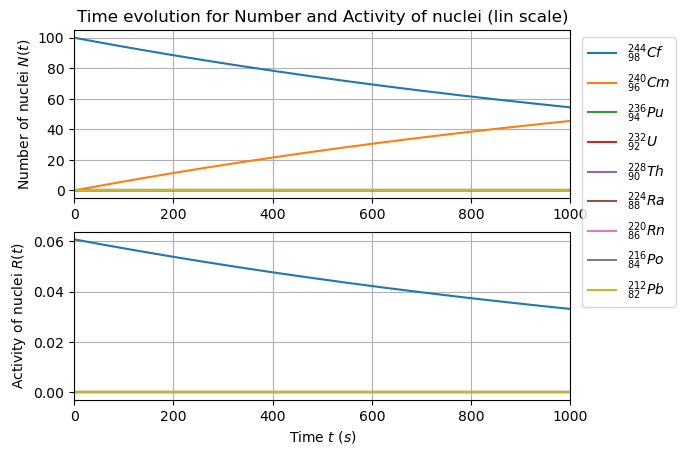

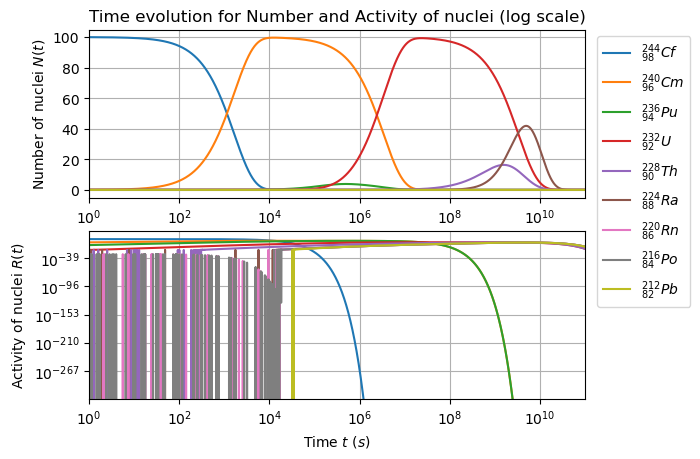

In [17]:
half_lives= [1140,2.33e6,104400,2.271e9,5.992e8,3197e6,56,0.15,39600]
elmt_names = ['Cf','Cm','Pu','U','Th','Ra','Rn','Po','Pb']
Avals = [244,240,236,232,228,224,220,216,212]
decays=["a","a","a","a","a","a","a","a","a"]
time_evol(half_lives,elmt_names,Avals,decays,100,1000,0,11,6,'s')